In [1]:
# Put this at the very top of your notebook
%load_ext autoreload
%autoreload 2

# Add parent directory to path to find the 'utils' folder
import sys
sys.path.append('..')

# Import your module. Now, any changes in the .py file will be picked up automatically!
import utils.my_analysis_functions as maf

# DISTAL RANGES - NO MATERIAL

In [2]:
distal_ranges_no_material = maf.compute_distal_ranges("../data/No_Material_screen_ON")
#distal_ranges_no_material.to_csv('data/16_07_25/No_Material_screen_ON/distal_ranges_no_material.csv',index=False)
distal_ranges_no_material = distal_ranges_no_material[:10]
distal_ranges_no_material

,File,Distal 80% Range [mm]
0,60.csv,30.269849
1,70.csv,40.018325
2,80.csv,51.445685
3,90.csv,63.198161
4,110.csv,90.684893
5,130.csv,122.357675
6,150.csv,157.079376
7,170.csv,195.692236
8,190.csv,237.115261
9,200.csv,258.691557


# DISTAL RANGES - 120% BLOCK

In [3]:
distal_ranges_120_block = maf.compute_R80_errors("../data/120%_Block",5000,0.01)
distal_ranges_120_block

Focusing analysis on ROI: Depth from 0 to 36.503748857216905.
Using 19 out of 180 total data points for the analysis.
Performing bootstrap with 5000 samples...
Bootstrap complete. 0 of 5000 samples failed.

--- Bootstrap Results ---
Best estimate for R_80 (bootstrap mean): 16.4899
Error on R_80 (bootstrap std dev):     0.5240

  Final Result: R_80 = 16.490 ± 0.524
Focusing analysis on ROI: Depth from 0 to 46.404403973149606.
Using 25 out of 180 total data points for the analysis.
Performing bootstrap with 5000 samples...
Bootstrap complete. 0 of 5000 samples failed.

--- Bootstrap Results ---
Best estimate for R_80 (bootstrap mean): 26.3445
Error on R_80 (bootstrap std dev):     0.6077

  Final Result: R_80 = 26.344 ± 0.608
Focusing analysis on ROI: Depth from 7.804146867654161 to 57.80414686765416.
Using 27 out of 180 total data points for the analysis.
Performing bootstrap with 5000 samples...
Bootstrap complete. 0 of 5000 samples failed.

--- Bootstrap Results ---
Best estimate for 

,File,Distal 80% Range [mm],Error [mm],Error [%]
0,60.csv,16.503749,0.523978,3.174903
1,70.csv,26.404404,0.607707,2.301537
2,80.csv,37.804147,0.530118,1.402274
3,90.csv,49.445347,0.479922,0.970612
4,110.csv,76.865751,0.817877,1.064033
5,130.csv,108.487971,0.601465,0.554407
6,150.csv,143.238203,0.346510,0.241912
7,170.csv,181.818041,0.248394,0.136617
8,190.csv,223.270627,0.185353,0.083017
9,200.csv,244.856133,0.175921,0.071847


# WET & WER - 120% BLOCK

In [4]:
WET_120_block = distal_ranges_no_material['Distal 80% Range [mm]'] - distal_ranges_120_block['Distal 80% Range [mm]']
WER_120_block = WET_120_block/10.6
print(WET_120_block,WER_120_block)

0    13.766100
1    13.613921
2    13.641538
3    13.752815
4    13.819142
5    13.869704
6    13.841172
7    13.874196
8    13.844634
9    13.835423
Name: Distal 80% Range [mm], dtype: float64 0    1.298689
1    1.284332
2    1.286938
3    1.297435
4    1.303693
5    1.308463
6    1.305771
7    1.308886
8    1.306098
9    1.305229
Name: Distal 80% Range [mm], dtype: float64


In [5]:
Energies = maf.pd.read_csv('../data/Energies.csv')

x = maf.np.array(Energies['Energy [Mev]'])
x_err = maf.np.array(Energies['Error [Mev]'])

baseline = maf.np.full((10),1.225)
topline = maf.np.full((10),1.375)

WER_120_block = maf.np.array(WER_120_block)

block_fit_err = maf.np.array(distal_ranges_120_block['Error [mm]']/distal_ranges_120_block['Distal 80% Range [mm]'])
thickness_120_err = maf.np.full(shape=(1, 10), fill_value=0.1/10.6)
#thickness_err = maf.np.array([0.1,0.05,0.05,0.05,0.05,0.05])
#thickness_rel_err = thicknesess/thickness_err

tot_err_120_block = maf.np.sqrt(block_fit_err**2+thickness_120_err**2)


WER_120_block_err = WER_120_block*tot_err_120_block


In [6]:
WER_data_120_block = {'Energy [Mev]': x, 'WER value' : WER_120_block, 'Absolute Error' : WER_120_block_err[0,:],
                       'Relative Error' : tot_err_120_block[0,:], 'Percentage Error [%]' : tot_err_120_block[0,:]*100}
df = maf.pd.DataFrame(data=WER_data_120_block)
df.to_csv('../Outputs/WER_data_120_block.csv',index=False)
df

,Energy [Mev],WER value,Absolute Error,Relative Error,Percentage Error [%]
0,60,1.298689,0.043014,0.033121,3.312099
1,70,1.284332,0.031946,0.024874,2.487382
2,80,1.286938,0.021750,0.016901,1.690079
3,90,1.297435,0.017561,0.013535,1.353545
4,110,1.303693,0.018539,0.014220,1.422028
5,130,1.308463,0.014318,0.010942,1.094241
6,150,1.305771,0.012717,0.009739,0.973919
7,170,1.308886,0.012477,0.009532,0.953237
8,190,1.306098,0.012369,0.009470,0.947042
9,200,1.305229,0.012349,0.009461,0.946128


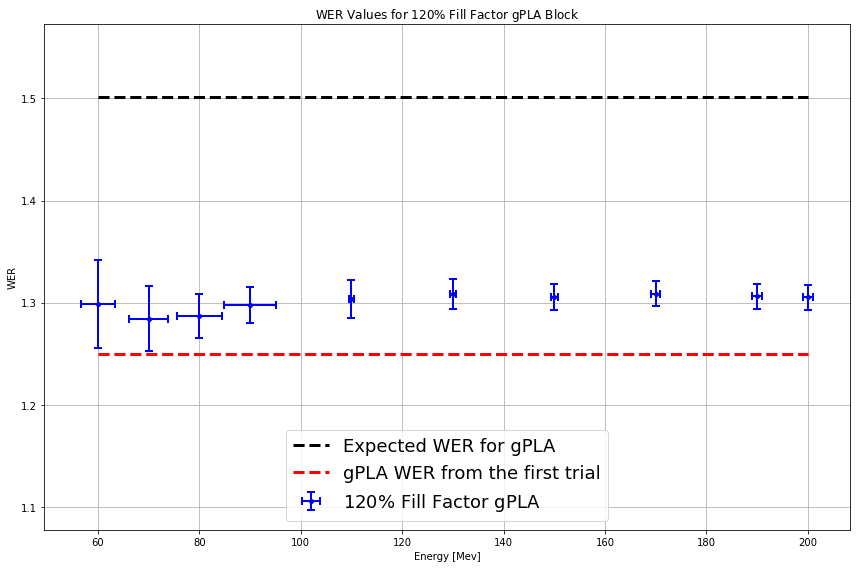

In [20]:
exp_wer_gpla = maf.np.full((10),1.501)
first_wer_gpla = maf.np.full((10),1.25)

baseline = maf.np.full((10),1.1)
topline = maf.np.full((10),1.55)

maf.plt.figure(figsize=(12,8))

maf.plt.errorbar(x,WER_120_block,WER_120_block_err,x_err,c='blue',marker='.',
             markersize=8,linestyle='--',elinewidth=2,linewidth=0,capsize=4,capthick=2,label='120$\%$ Fill Factor gPLA')

maf.plt.plot(x, topline, marker="o", markersize=0, linewidth=0)
maf.plt.plot(x, baseline, marker="o", markersize=0, linewidth=0)
#maf.plt.plot(x, WER_120_block, color="blue", marker="o",markersize=2, linewidth=1)

maf.plt.plot(x, exp_wer_gpla, marker="o", markersize=0, linewidth=3,c='black',linestyle='--',label='Expected WER for gPLA')
maf.plt.plot(x, first_wer_gpla, marker="o", markersize=0, linewidth=3,c='r',linestyle='--',label='gPLA WER from the first trial')

maf.plt.xlabel("Energy [Mev]")
maf.plt.ylabel("WER")
maf.plt.title("WER Values for 120$\%$ Fill Factor gPLA Block")
maf.plt.grid(True)
maf.plt.legend(fontsize=18)
maf.plt.tight_layout()
maf.plt.show()

# WET & WER - ALL BLOCKS

In [8]:
distal_ranges_all_blocks = maf.compute_R80_errors("../data/All_Blocks",5000,0.01)
distal_ranges_all_blocks

Focusing analysis on ROI: Depth from 216.01418670808673 to 266.01418670808675.
Using 27 out of 180 total data points for the analysis.
Performing bootstrap with 5000 samples...
Bootstrap complete. 0 of 5000 samples failed.

--- Bootstrap Results ---
Best estimate for R_80 (bootstrap mean): 245.9690
Error on R_80 (bootstrap std dev):     0.1860

  Final Result: R_80 = 245.969 ± 0.186
Focusing analysis on ROI: Depth from 215.91115842709402 to 265.91115842709405.
Using 27 out of 180 total data points for the analysis.
Performing bootstrap with 5000 samples...
Bootstrap complete. 0 of 5000 samples failed.

--- Bootstrap Results ---
Best estimate for R_80 (bootstrap mean): 245.8703
Error on R_80 (bootstrap std dev):     0.1822

  Final Result: R_80 = 245.870 ± 0.182
Focusing analysis on ROI: Depth from 215.6995226006799 to 265.69952260067987.
Using 27 out of 180 total data points for the analysis.
Performing bootstrap with 5000 samples...
Bootstrap complete. 0 of 5000 samples failed.

--- B

,File,Distal 80% Range [mm],Error [mm],Error [%]
0,102.csv,246.014187,0.186027,0.075616
1,104.csv,245.911158,0.182236,0.074106
2,106.csv,245.699523,0.195547,0.079588
3,110.csv,245.356021,0.192870,0.078608
4,115.csv,244.759086,0.190091,0.077665
5,120.csv,244.779722,0.187108,0.076439


In [9]:
thicknesses = maf.np.array([9.85,9.90,10.05,10.10,10.50,10.60])
range_no_material_200 = maf.np.full(shape=(thicknesses.shape),
                                     fill_value=maf.np.array(distal_ranges_no_material['Distal 80% Range [mm]'])[-1])
WET_all_blocks = range_no_material_200 - maf.np.array(distal_ranges_all_blocks['Distal 80% Range [mm]'])
WER_all_blocks = WET_all_blocks/thicknesses
print(WET_all_blocks,WER_all_blocks)

[12.67736984 12.78039812 12.99203395 13.33553586 13.93247079 13.91183462] [1.28704262 1.29094931 1.2927397  1.32035009 1.32690198 1.31243723]


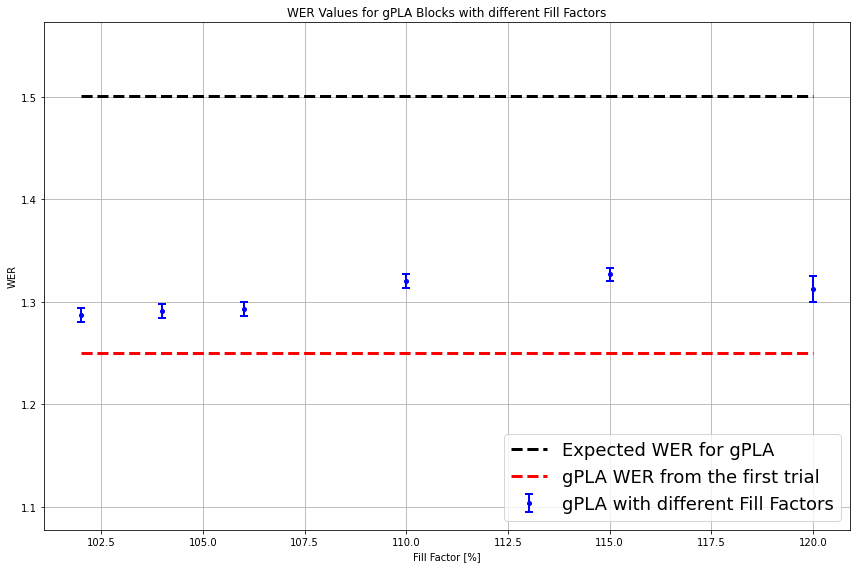

In [19]:
fill_factors = maf.np.array([102,104,106,110,115,120])
exp_wer_gpla = maf.np.full((6),1.501)
first_wer_gpla = maf.np.full((6),1.25)

baseline = maf.np.full((6),1.1)
topline = maf.np.full((6),1.55)

WER_all_blocks = maf.np.array(WER_all_blocks)

blocks_fit_err = maf.np.array(distal_ranges_all_blocks['Error [mm]']/distal_ranges_all_blocks['Distal 80% Range [mm]'])
thickness_err = maf.np.array([0.05,0.05,0.05,0.05,0.05,0.1])
thickness_rel_err = thickness_err/thicknesses

tot_err_blocks = maf.np.sqrt(blocks_fit_err**2+thickness_rel_err**2)


WER_all_blocks_err = WER_all_blocks*tot_err_blocks

maf.plt.figure(figsize=(12,8))
maf.plt.errorbar(fill_factors,WER_all_blocks,WER_all_blocks_err,x_err=None,c='blue',marker='.',
             markersize=8,linestyle='--',elinewidth=2,linewidth=0,capsize=4,capthick=2,label='gPLA with different Fill Factors')
maf.plt.plot(fill_factors, exp_wer_gpla, marker="o", markersize=0, linewidth=3,c='black',linestyle='--',label='Expected WER for gPLA')
maf.plt.plot(fill_factors, first_wer_gpla, marker="o", markersize=0, linewidth=3,c='r',linestyle='--',label='gPLA WER from the first trial')

maf.plt.plot(fill_factors, topline, marker="o", markersize=0, linewidth=0)
maf.plt.plot(fill_factors, baseline, marker="o", markersize=0, linewidth=0)

maf.plt.xlabel("Fill Factor [%]")
maf.plt.ylabel("WER")
maf.plt.title("WER Values for gPLA Blocks with different Fill Factors")
maf.plt.grid(True)
maf.plt.legend(fontsize=18)
maf.plt.tight_layout()
maf.plt.show()

# PLOTTING BRAGG CURVES

### NO MATERIAL - EXAMPLE PLOT

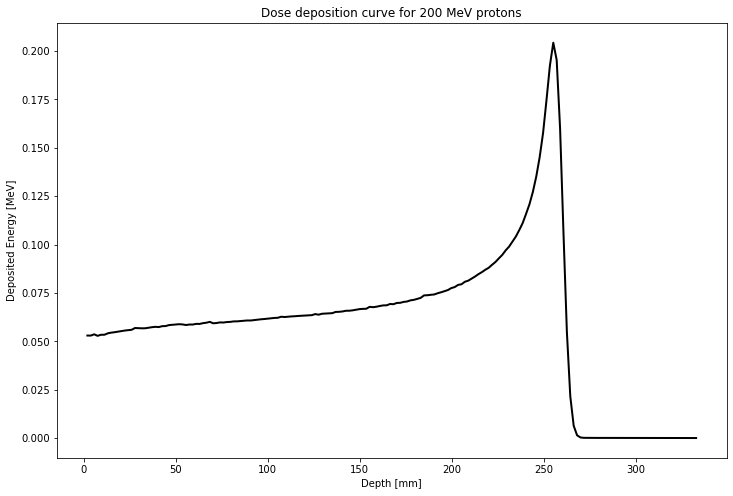

In [15]:
# Load the file as text
with open("../../20_05_25/data/Full block/No material/200.csv", "r") as f:
    lines = f.readlines()

# Extract curve depth and gain
depths1 = maf.extract_section("Curve depth: [mm]", lines)
gains1 = maf.np.array(maf.extract_section("Curve gains: [counts]", lines))*3.6/1000000
#r80_1 = maf.calculate_R80(depths1,gains1)

primary_spline1 = maf.UnivariateSpline(depths1, gains1, s=0)            
x_fine1 = maf.np.linspace(min(depths1), max(depths1), 2000)
y_fine1 = primary_spline1(x_fine1)
y_max1 = maf.np.max(y_fine1)
x_peak1 = x_fine1[maf.np.argmax(y_fine1)]
y_80_1 = 0.80 * y_max1
shifted_spline1 = maf.UnivariateSpline(depths1, gains1 - y_80_1, s=0)
all_roots1 = shifted_spline1.roots()
distal_roots1 = all_roots1[all_roots1 > x_peak1]

# Plotting
maf.plt.figure(figsize=(12,8))
maf.plt.plot(depths1, gains1, marker='o',markersize=0,c='black',linewidth=2)
maf.plt.title("Dose deposition curve for 200 MeV protons")
maf.plt.xlabel("Depth [mm]")
maf.plt.ylabel("Deposited Energy [MeV]")
maf.plt.grid(False)
maf.plt.show()

### gPLA DEPTH-DOSE AT 200 MeV

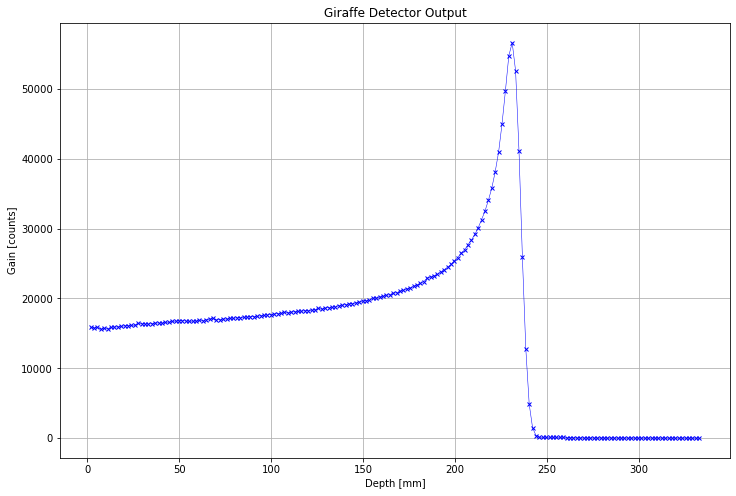

In [16]:
# Load the file as text
with open("../../20_05_25/data/Full block/gPLA/200.csv", "r") as f:
    lines = f.readlines()

# Extract curve depth and gain
depths1 = maf.extract_section("Curve depth: [mm]", lines)
gains1 = maf.extract_section("Curve gains: [counts]", lines)
#r80_1 = maf.calculate_R80(depths1,gains1)

primary_spline1 = maf.UnivariateSpline(depths1, gains1, s=0)            
x_fine1 = maf.np.linspace(min(depths1), max(depths1), 2000)
y_fine1 = primary_spline1(x_fine1)
y_max1 = maf.np.max(y_fine1)
x_peak1 = x_fine1[maf.np.argmax(y_fine1)]
y_80_1 = 0.80 * y_max1
shifted_spline1 = maf.UnivariateSpline(depths1, gains1 - y_80_1, s=0)
all_roots1 = shifted_spline1.roots()
distal_roots1 = all_roots1[all_roots1 > x_peak1]

# Plotting
maf.plt.figure(figsize=(12,8))
maf.plt.plot(depths1, gains1, marker='x',markersize=4,c='blue',linewidth=0.5)
maf.plt.xlabel("Depth [mm]")
maf.plt.ylabel("Gain [counts]")
maf.plt.title("Giraffe Detector Output")
maf.plt.grid(True)
maf.plt.show()

/tmp/ipykernel_2204/4203212160.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  maf.plt.plot(distal_roots1, y_80_1, marker='v',markersize=8,linewidth=0,c='black',label='$R_{80\_w\_material}$= %0.1f$\pm$%0.1f mm'%(distal_roots1,0.2))
/tmp/ipykernel_2204/4203212160.py:32: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  maf.plt.plot(distal_roots2, y_80_2, marker='v',markersize=8,linewidth=0,c='red',label='$R_{80\_w/o\_material}$= %0.1f$\pm$%0.1f mm'%(distal_roots2,0.4))


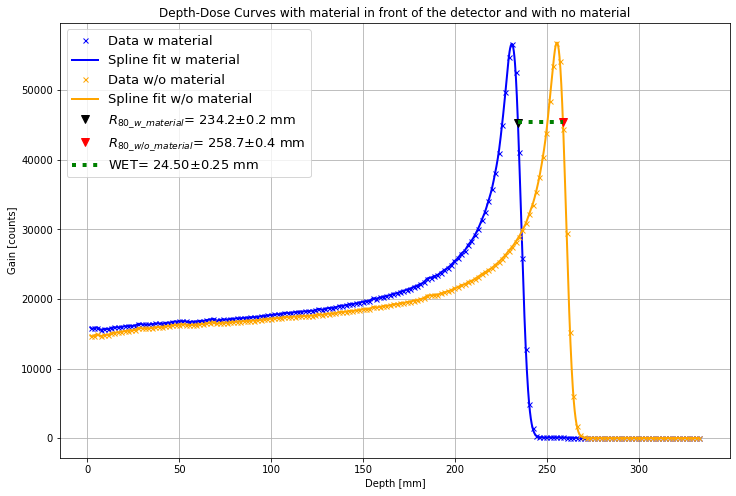

56743.647 45451.43356377508


In [3]:
# Load the file as text
with open("../../20_05_25/data/Full block/No material/200.csv", "r") as f:
    lines = f.readlines()

# Extract curve depth and gain
depths2 = maf.extract_section("Curve depth: [mm]", lines)
gains2 = maf.extract_section("Curve gains: [counts]", lines)
#r80_2 = maf.calculate_R80(depths2,gains2)


primary_spline2 = maf.UnivariateSpline(depths2, gains2, s=0)            
x_fine2 = maf.np.linspace(min(depths2), max(depths2), 2000)
y_fine2 = primary_spline2(x_fine2)
y_max2 = maf.np.max(y_fine2)
x_peak2 = x_fine2[maf.np.argmax(y_fine2)]
y_80_2 = 0.80 * y_max2
shifted_spline2 = maf.UnivariateSpline(depths2, gains2 - y_80_2, s=0)
all_roots2 = shifted_spline2.roots()
distal_roots2 = all_roots2[all_roots2 > x_peak2]

x_wet = maf.np.linspace(distal_roots1,distal_roots2,1000)
y_wet = maf.np.full(shape=x_wet.shape,fill_value=y_80_2)

# Plotting

maf.plt.figure(figsize=(12,8))
maf.plt.plot(depths1, gains1, marker='x',markersize=5,linewidth=0,c='blue',label='Data w material')
maf.plt.plot(x_fine1, y_fine1, marker='o',markersize=0,linewidth=2,c='blue',label='Spline fit w material')
maf.plt.plot(depths2, gains2, marker='x',markersize=5,linewidth=0,c='orange',label='Data w/o material')
maf.plt.plot(x_fine2, y_fine2, marker='o',markersize=0,linewidth=2,c='orange',label='Spline fit w/o material')
maf.plt.plot(distal_roots1, y_80_1, marker='v',markersize=8,linewidth=0,c='black',label='$R_{80\_w\_material}$= %0.1f$\pm$%0.1f mm'%(distal_roots1,0.2))
maf.plt.plot(distal_roots2, y_80_2, marker='v',markersize=8,linewidth=0,c='red',label='$R_{80\_w/o\_material}$= %0.1f$\pm$%0.1f mm'%(distal_roots2,0.4))
maf.plt.plot(x_wet, y_wet, marker='o',markersize=0,linewidth=4,linestyle=':',c='green',label='WET= %0.2f$\pm$%0.2f mm'%(24.50,0.25))
maf.plt.xlabel("Depth [mm]")
maf.plt.ylabel("Gain [counts]")
maf.plt.title("Depth-Dose Curves with material in front of the detector and with no material")
maf.plt.grid(True)
maf.plt.legend(fontsize=13)
maf.plt.show()
print(maf.np.max(gains2),y_80_2)

In [93]:
maf.bootstrap(depths1,gains1,5000,0.1,205,255)
maf.bootstrap(depths2,gains2,5000,0.1,230,280)

Focusing analysis on ROI: Depth from 205 to 255.
Using 27 out of 180 total data points for the analysis.
Performing bootstrap with 5000 samples...
Bootstrap complete. 0 of 5000 samples failed.

--- Bootstrap Results ---
Best estimate for R_80 (bootstrap mean): 234.1428
Error on R_80 (bootstrap std dev):     0.1790

  Final Result: R_80 = 234.143 ± 0.179
Focusing analysis on ROI: Depth from 230 to 280.
Using 27 out of 180 total data points for the analysis.
Performing bootstrap with 5000 samples...
Bootstrap complete. 0 of 5000 samples failed.

--- Bootstrap Results ---
Best estimate for R_80 (bootstrap mean): 258.6047
Error on R_80 (bootstrap std dev):     0.3819

  Final Result: R_80 = 258.605 ± 0.382


0.38193212490026573